<a id='intro'></a>
## Introduction

I have selected the TMBD dataset: https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000 and I will be asking the following questions:
- #### Is there a positive correlation between the movies budget and its ratings?
- #### How has the industry changed over time?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
tmbd_movies_df = pd.read_csv('tmdb-movies.csv')
tmbd_movies_df.head()

In [ ]:
tmbd_movies_df.describe()

In [ ]:
tmbd_movies_df.info()

In the cell above we can see that there are multiple null rows which we will need to drop in the cleaning process. There are also some columns which will not be relevant to our analysis, such as the homepage (excessive information can be dropped). We also want to get rid of movies with low value counts (not enough data to correctly assume the rating). I will use the 25% quartile as a basis.


## Data cleaning

### dropping columns not relevant to the analysis and low vote counts

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

tmbd_movies_df_trimmed = tmbd_movies_df.drop(['homepage', 'imdb_id', 'tagline'], axis=1)
tmbd_movies_df_trimmed = tmbd_movies_df_trimmed.query('vote_count > 17')
tmbd_movies_df_trimmed.info()

### dropping null rows

In [ ]:
tmbd_movies_df_trimmed = tmbd_movies_df_trimmed.dropna()
tmbd_movies_df_trimmed.info()

In [21]:
tmbd_movies_df_trimmed.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6879.000000,6879.000000,6.879000e+03,6.879000e+03,6879.000000,6879.000000,6879.000000,6879.000000,6.879000e+03,6.879000e+03
mean,54891.092601,0.874537,2.180165e+07,6.160677e+07,104.989824,329.462422,6.099186,2001.100596,2.605365e+07,7.915522e+07
std,85286.863865,1.182072,3.646494e+07,1.421049e+08,26.095362,698.317314,0.834640,12.375054,3.998309e+07,1.750837e+08
min,5.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,18.000000,2.200000,1960.000000,0.000000e+00,0.000000e+00
25%,9360.500000,0.329373,0.000000e+00,0.000000e+00,92.000000,36.000000,5.600000,1994.000000,0.000000e+00,0.000000e+00
50%,13506.000000,0.551406,6.000000e+06,7.022209e+06,101.000000,87.000000,6.100000,2005.000000,8.864045e+06,9.219668e+06
75%,54866.500000,0.997583,2.900000e+07,5.920496e+07,115.000000,283.000000,6.700000,2011.000000,3.597534e+07,8.038284e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Is there a positive correlation between the movies budget and its ratings?

In [22]:
budget_mean = tmbd_movies_df_trimmed.budget_adj.mean()

higher_than_average_budget = tmbd_movies_df_trimmed.query('budget_adj > @budget_mean').vote_average.mean()
lower_than_average_budget = tmbd_movies_df_trimmed.query('budget_adj < @budget_mean').vote_average.mean()

print(f'higher {higher_than_average_budget} lower {lower_than_average_budget}')

higher 6.161624274877287 lower 6.069016817593791


movies with higher than average budgets score almost the same as movies with lower budgets - lets explore this relationship further

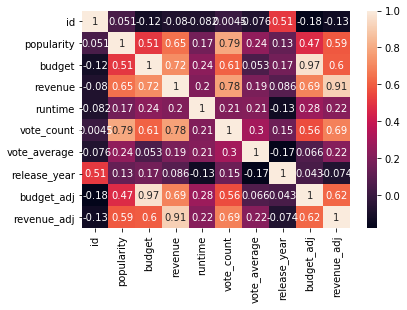

In [23]:
sn.heatmap(tmbd_movies_df_trimmed.corr(), annot=True)
plt.show()

In [34]:
def scatter_plot(y, x, ylabel, xlabel, title):
    plt.scatter(y, x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

in this correlation matrix we can see that budget and vote_averages have very little correlation (0.066)

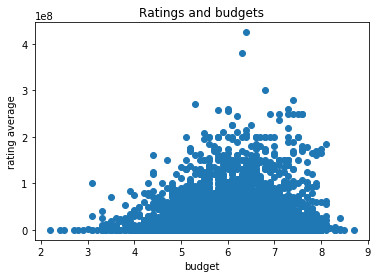

In [37]:
scatter_plot(tmbd_movies_df_trimmed.vote_average, tmbd_movies_df_trimmed.budget, 'rating average', 'budget', 'Ratings and budgets')

From these findings I have come to a conclusion that there is not a correlation between the budget and the ratings in this dataset

### How has the industry changed over time

In [26]:
tmbd_movies_df_trimmed

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


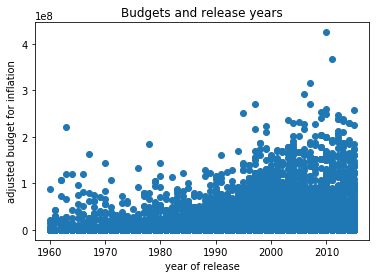

In [38]:
scatter_plot(tmbd_movies_df_trimmed.release_year, tmbd_movies_df_trimmed.budget_adj, 'adjusted budget for inflation', 'year of release', 'Budgets and release years')

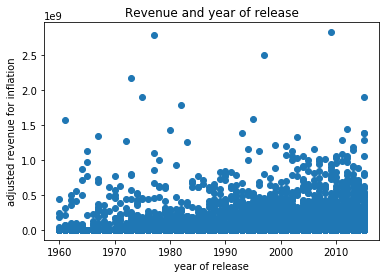

In [42]:
scatter_plot(tmbd_movies_df_trimmed.release_year, tmbd_movies_df_trimmed.revenue_adj, 'adjusted revenue for inflation', 'year of release', 'Revenue and year of release')

Here we can see that the movie industry itself has gotten bigger - movies have bigger budgets over the years. Their revenue is showing the same trend.

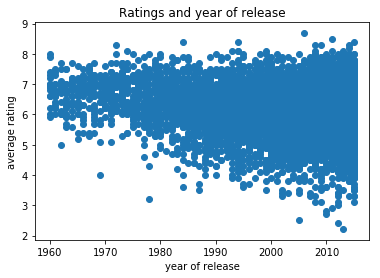

In [43]:
scatter_plot(tmbd_movies_df_trimmed.release_year, tmbd_movies_df_trimmed.vote_average, 'average rating', 'year of release', 'Ratings and year of release')

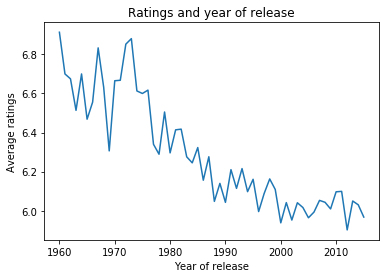

In [44]:
line_chart(tmbd_movies_df_trimmed.groupby(['release_year']).vote_average.mean(), 'Year of release', 'Average ratings', 'Ratings and year of release')

In [31]:
def line_chart(data, xlabel, ylabel, title):
    plt.plot(data);
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    plt.title(title)

Interestingly, the movies are getting worse and worse ratings every year. This might be due to multiple factors.

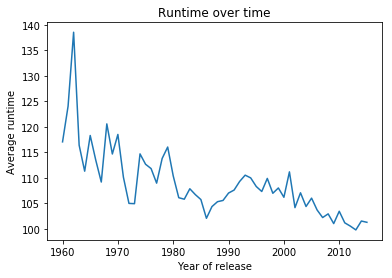

In [32]:
line_chart(tmbd_movies_df_trimmed.groupby(['release_year']).runtime.mean(), 'Year of release', 'Average runtime', 'Runtime over time')

Surprisingly there seems to also be a steady decrease in runtime 

## Conclusion

In conclusion, I have found interesting information about changes in the movie industry. It appears that movie ratings are going down, showing a negative correlation between year and ratings. The average runtime is steadily going down. I also explored correlation between movie budgets and ratings and found there to be no correlation between them in this dataset.

## Limitations

There was one main limitation and that was missing data - there were a lot of missing values which i dropped using the dropna() panda function. Then there is a problem with the ratings - they are based on a few votes on just one website with a smaller vote counts. This means that perhaps running the voting on different sites / with different users / with more users could produce very different results; hence why we need to take any popularity discussed in this notebook with a grain of salt.

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0